In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from wordcloud import WordCloud

import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive

In [ ]:
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/fedex.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [ ]:
df.shape

In [ ]:
df.count()

Year                     3604175
Month                    3604175
DayofMonth               3604175
DayOfWeek                3604175
Actual_Shipment_Time     3522573
Planned_Shipment_Time    3604175
Planned_Delivery_Time    3604175
Carrier_Name             3604175
Carrier_Num              3604175
Planned_TimeofTravel     3603628
Shipment_Delay           3522573
Source                   3604175
Destination              3604175
Distance                 3604175
Delivery_Status          3522573
dtype: int64

In [ ]:
df.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name               int64
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                     int64
Destination                int64
Distance                   int64
Delivery_Status          float64
dtype: object

In [ ]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.522573e+06,3.604175e+06,3.522573e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291603e+02,1.115893e+01,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.951011e+01,3.618888e+01,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


In [ ]:
duplicate=df.duplicated()
print(duplicate)
sum(duplicate)

0          False
1          False
2          False
3          False
4          False
           ...  
3604170    False
3604171    False
3604172    False
3604173    False
3604174    False
Length: 3604175, dtype: bool


4

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.count()

Year                     3604171
Month                    3604171
DayofMonth               3604171
DayOfWeek                3604171
Actual_Shipment_Time     3522569
Planned_Shipment_Time    3604171
Planned_Delivery_Time    3604171
Carrier_Name             3604171
Carrier_Num              3604171
Planned_TimeofTravel     3603624
Shipment_Delay           3522569
Source                   3604171
Destination              3604171
Distance                 3604171
Delivery_Status          3522569
dtype: int64

In [ ]:
df.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [ ]:
df['Delivery_Status']=df['Delivery_Status'].fillna(method='ffill')

<ipython-input-8-453d550a2fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery_Status']=df['Delivery_Status'].fillna(method='ffill')


In [ ]:
df.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status              0
dtype: int64

In [ ]:
print(df.skew())

Year                     0.000000
Month                   -0.016887
DayofMonth               0.005830
DayOfWeek                0.048492
Actual_Shipment_Time     0.043878
Planned_Shipment_Time    0.081864
Planned_Delivery_Time   -0.207588
Carrier_Num              0.894850
Planned_TimeofTravel     1.501041
Shipment_Delay           6.256653
Distance                 1.629241
Delivery_Status          1.451951
dtype: float64


<ipython-input-9-b9bdaf19c078>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


In [ ]:
print(df.kurt())

Year                      0.000000
Month                    -1.264567
DayofMonth               -1.194501
DayOfWeek                -1.214070
Actual_Shipment_Time     -0.985401
Planned_Shipment_Time    -1.047930
Planned_Delivery_Time    -0.603209
Carrier_Num              -0.244558
Planned_TimeofTravel      2.800793
Shipment_Delay           96.065649
Distance                  3.309963
Delivery_Status           0.108161
dtype: float64


<ipython-input-10-576208fbb117>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.kurt())


In [ ]:
df.count()

Year                     3604171
Month                    3604171
DayofMonth               3604171
DayOfWeek                3604171
Actual_Shipment_Time     3604171
Planned_Shipment_Time    3604171
Planned_Delivery_Time    3604171
Carrier_Name             3604171
Carrier_Num              3604171
Planned_TimeofTravel     3604171
Shipment_Delay           3604171
Source                   3604171
Destination              3604171
Distance                 3604171
Delivery_Status          3604171
dtype: int64

In [ ]:
df.drop('Year',axis=1,inplace=True)

KeyError: ignored

         Year  Month  DayofMonth  DayOfWeek  Actual_Shipment_Time  \
0        2008      1           3          4                2003.0   
1        2008      1           3          4                 754.0   
2        2008      1           3          4                 628.0   
3        2008      1           3          4                 926.0   
4        2008      1           3          4                1829.0   
...       ...    ...         ...        ...                   ...   
3604170  2008      6          19          4                1059.0   
3604171  2008      6          19          4                 555.0   
3604172  2008      6          19          4                 821.0   
3604173  2008      6          19          4                 718.0   
3604174  2008      6          19          4                1127.0   

         Planned_Shipment_Time  Planned_Delivery_Time  Carrier_Name  \
0                         1955                   2225            17   
1                          73

In [ ]:
X=df.loc[:,df.columns!='Delivery_Status']
type(X)

pandas.core.frame.DataFrame

In [ ]:
X

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191


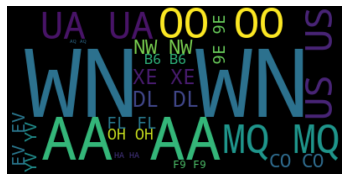

In [ ]:
text = " ".join(Carrier_Name for Carrier_Name in X.Carrier_Name)
word_cloud = WordCloud().generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

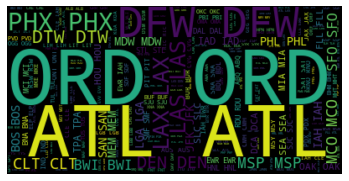

In [ ]:
text1 = " ".join(Source for Source in X.Source)
word_cloud1 = WordCloud().generate(text1)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

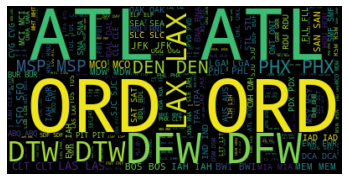

In [ ]:
text2 = " ".join(Destination for Destination in X.Destination)
word_cloud2 = WordCloud().generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
y=np.array(df['Delivery_Status'])
y

array([0., 1., 0., ..., 0., 0., 1.])

In [ ]:
le=LabelEncoder()
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Carrier_Name"]=le.fit_transform(df["Carrier_Name"])
df[["Source","Destination","Carrier_Name"]]


,Source,Destination,Carrier_Name
0,134,281,17
1,134,281,17
2,139,48,17
3,139,48,17
4,139,48,17
...,...,...,...
3604170,18,146,6
3604171,242,18,6
3604172,18,140,6
3604173,50,18,6


In [ ]:
df1=df.copy()
df1.drop(['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time','Carrier_Num','Planned_TimeofTravel','Shipment_Delay','Distance','Delivery_Status'],axis=1,inplace=True)
df1=df1.reset_index(drop=True)
df1

,Year,Month,DayofMonth,DayOfWeek,Carrier_Name,Source,Destination
0,2008,1,3,4,17,134,281
1,2008,1,3,4,17,134,281
2,2008,1,3,4,17,139,48
3,2008,1,3,4,17,139,48
4,2008,1,3,4,17,139,48
...,...,...,...,...,...,...,...
3604166,2008,6,19,4,6,18,146
3604167,2008,6,19,4,6,242,18
3604168,2008,6,19,4,6,18,140
3604169,2008,6,19,4,6,50,18


In [ ]:
numerical=['Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time',
       'Planned_TimeofTravel', 'Shipment_Delay', 'Distance']
numerical

['Actual_Shipment_Time',
 'Planned_Shipment_Time',
 'Planned_Delivery_Time',
 'Planned_TimeofTravel',
 'Shipment_Delay',
 'Distance']

In [ ]:
num_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='mean'))])

In [ ]:
preprocessor=ColumnTransformer(transformers=[('num',num_pipeline,numerical)]) 

In [ ]:
imputation=preprocessor.fit(X)

In [ ]:
joblib.dump(imputation,'meanimpute')

['meanimpute']

In [ ]:
cleandata=pd.DataFrame(imputation.transform(X),columns=numerical)
cleandata

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance
0,2003.0,1955.0,2225.0,150.0,8.0,810.0
1,754.0,735.0,1000.0,145.0,19.0,810.0
2,628.0,620.0,750.0,90.0,8.0,515.0
3,926.0,930.0,1100.0,90.0,-4.0,515.0
4,1829.0,1755.0,1925.0,90.0,34.0,515.0
...,...,...,...,...,...,...
3604166,1059.0,1100.0,1256.0,236.0,-1.0,1572.0
3604167,555.0,600.0,738.0,98.0,-5.0,515.0
3604168,821.0,827.0,1003.0,96.0,-6.0,432.0
3604169,718.0,735.0,852.0,77.0,-17.0,191.0


In [ ]:
cleandata.isnull().sum()

Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Planned_TimeofTravel     0
Shipment_Delay           0
Distance                 0
dtype: int64

In [ ]:
cleandata.count()

Actual_Shipment_Time     3604171
Planned_Shipment_Time    3604171
Planned_Delivery_Time    3604171
Planned_TimeofTravel     3604171
Shipment_Delay           3604171
Distance                 3604171
dtype: int64

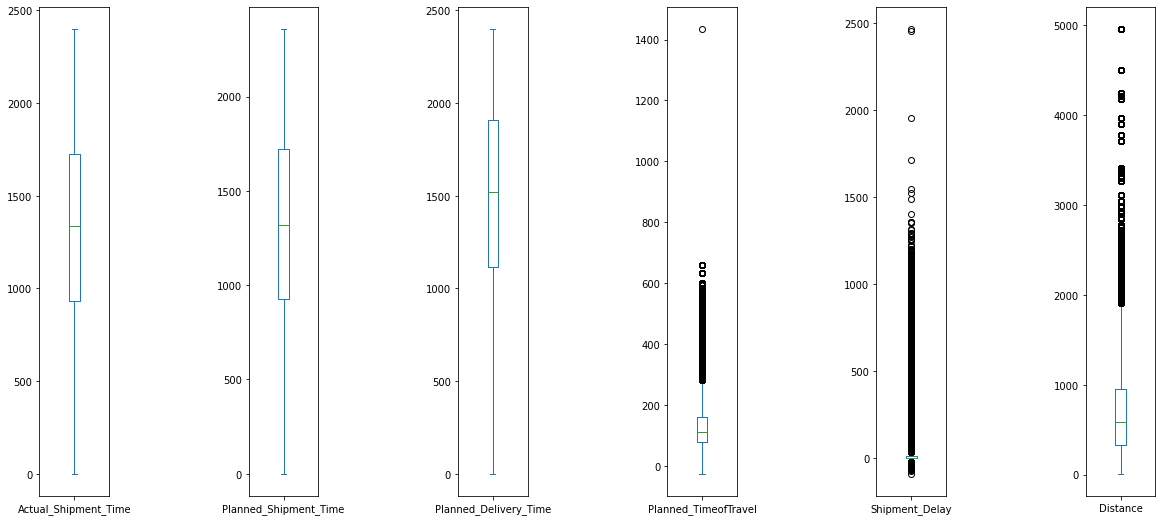

In [ ]:
cleandata.plot(kind='box',subplots=True,sharey=False,figsize=(20,9))
plt.subplots_adjust(wspace=2)
plt.show()

In [ ]:
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=['Planned_TimeofTravel','Shipment_Delay','Distance'])

In [ ]:
outlier=Pipeline(steps=[('winsor',winsor)])
outlier

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Planned_TimeofTravel', 'Shipment_Delay',
                                       'Distance']))])

In [ ]:
clean=winsor.fit(cleandata)

In [ ]:
joblib.dump(clean,'winsor')

['winsor']

In [ ]:
cleandata1=clean.transform(cleandata)

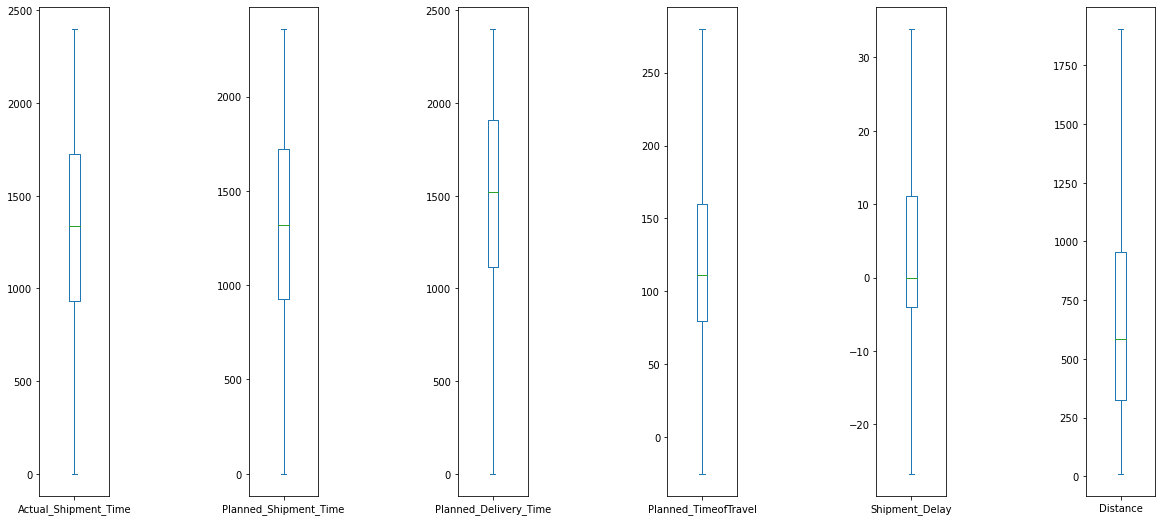

In [ ]:
cleandata1.plot(kind='box',subplots=True,sharey=False,figsize=(20,9))
plt.subplots_adjust(wspace=2)
plt.show()

In [ ]:
cleandata1

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance
0,2003.0,1955.0,2225.0,150.0,8.000000,810.0
1,754.0,735.0,1000.0,145.0,19.000000,810.0
2,628.0,620.0,750.0,90.0,8.000000,515.0
3,926.0,930.0,1100.0,90.0,-4.000000,515.0
4,1829.0,1755.0,1925.0,90.0,33.897302,515.0
...,...,...,...,...,...,...
3604166,1059.0,1100.0,1256.0,236.0,-1.000000,1572.0
3604167,555.0,600.0,738.0,98.0,-5.000000,515.0
3604168,821.0,827.0,1003.0,96.0,-6.000000,432.0
3604169,718.0,735.0,852.0,77.0,-17.000000,191.0


In [ ]:
clean_data=pd.concat([cleandata1,df1],axis=1,ignore_index=True)
clean_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2003.0,1955.0,2225.0,150.0,8.000000,810.0,2008,1,3,4,17,134,281
1,754.0,735.0,1000.0,145.0,19.000000,810.0,2008,1,3,4,17,134,281
2,628.0,620.0,750.0,90.0,8.000000,515.0,2008,1,3,4,17,139,48
3,926.0,930.0,1100.0,90.0,-4.000000,515.0,2008,1,3,4,17,139,48
4,1829.0,1755.0,1925.0,90.0,33.897302,515.0,2008,1,3,4,17,139,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604166,1059.0,1100.0,1256.0,236.0,-1.000000,1572.0,2008,6,19,4,6,18,146
3604167,555.0,600.0,738.0,98.0,-5.000000,515.0,2008,6,19,4,6,242,18
3604168,821.0,827.0,1003.0,96.0,-6.000000,432.0,2008,6,19,4,6,18,140
3604169,718.0,735.0,852.0,77.0,-17.000000,191.0,2008,6,19,4,6,50,18


In [ ]:
clean_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
clean_data.count()


0     3604171
1     3604171
2     3604171
3     3604171
4     3604171
5     3604171
6     3604171
7     3604171
8     3604171
9     3604171
10    3604171
11    3604171
12    3604171
dtype: int64

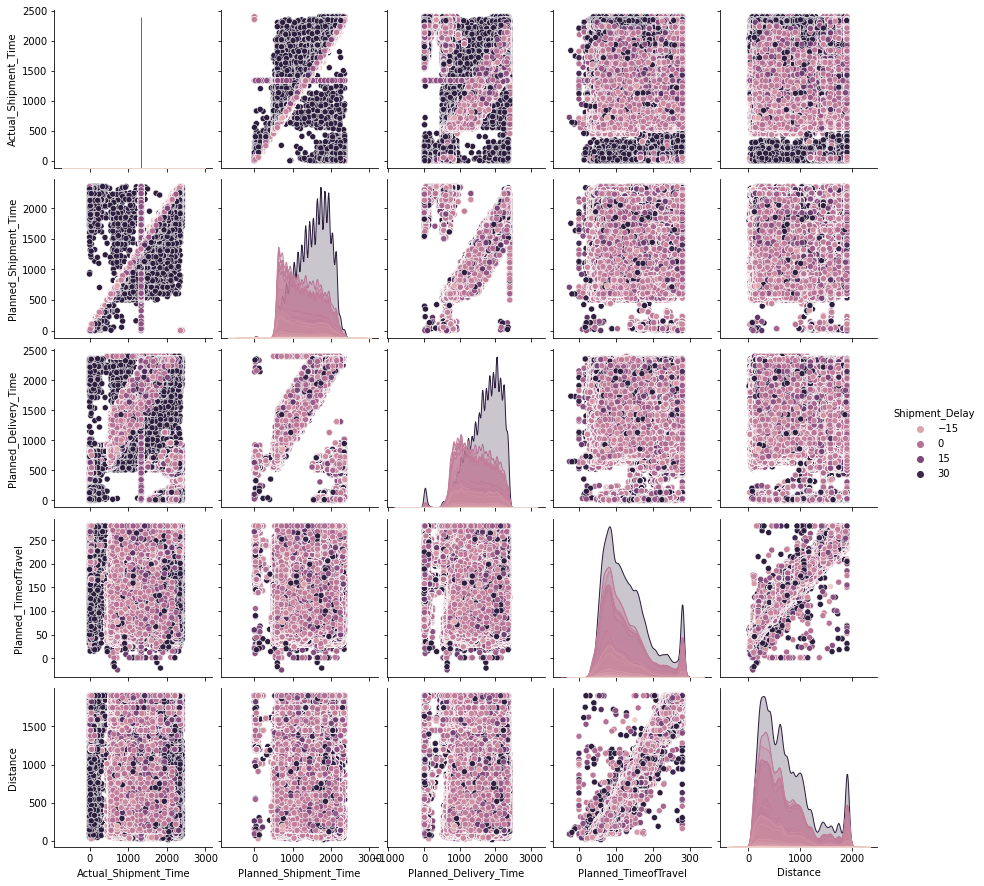

In [ ]:
sns.pairplot(cleandata1,hue='Shipment_Delay')

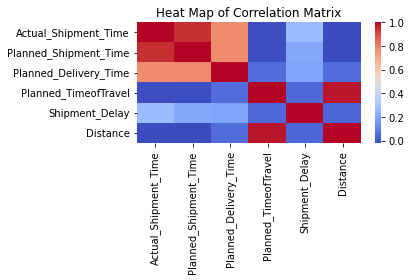

In [ ]:
corrmatrix = cleandata1.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
TWSS=[]
k=list(range(2,9))
for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(clean_data)
  TWSS.append(kmeans.inertia_)
TWSS

[1766111331837.1267,
 1333726508987.1685,
 1068013749546.1719,
 888406490160.713,
 717395996287.8906,
 627111649429.7273,
 563517373219.0667]

Text(0, 0.5, 'total within SS')

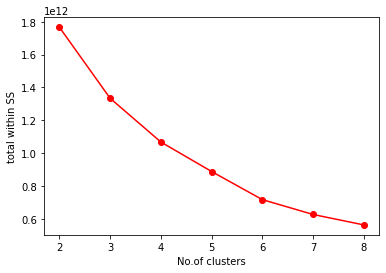

In [ ]:
plt.plot(k,TWSS,'ro-');plt.xlabel('No.of clusters');plt.ylabel('total within SS')

In [ ]:
silhouette_coefficient=[]
for k in range (2,10):
  kmeans=KMeans(n_clusters=k,init='random',random_state=1)
  kmeans.fit(clean_data)
  score=silhouette_score(clean_data,kmeans.labels_)
  k=k
  sil_cof=score
  silhouette_coefficient.append([k,sil_cof])
  silhouette_coefficient

splitting for training and test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(clean_data,y,test_size=0.2,random_state=42)

In [ ]:
print(f"X_train_shape:{X_train.shape}|X_test_shape:{X_test.shape}")
print(f"Y_train_shape:{Y_train.shape}|Y_test_shape:{Y_test.shape}")

X_train_shape:(2883336, 13)|X_test_shape:(720835, 13)
Y_train_shape:(2883336,)|Y_test_shape:(720835,)


gradient boosting

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    571883
         1.0       1.00      0.97      0.98    148952

    accuracy                           0.99    720835
   macro avg       1.00      0.98      0.99    720835
weighted avg       0.99      0.99      0.99    720835



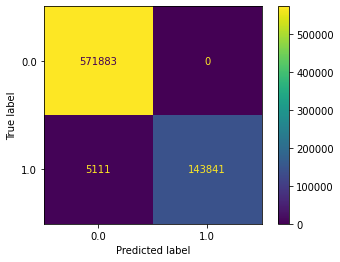

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)
joblib.dump(model, "GBC")
model = joblib.load("GBC")
model_pred=model.predict(X_test)
conf_mat=plot_confusion_matrix(model,X_test,Y_test)
print(classification_report(Y_test,model_pred))
print(conf_mat)


In [ ]:
del model
del model_pred

In [ ]:
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train,Y_train)
joblib.dump(model, "./Classifiers/RandomForestClassifier.joblib")
model = joblib.load("./Classifiers/RandomForestClassifier.joblib")
model_pred=model.predict(X_test)
conf_mat=plot_confusion_matrix(model,X_test,Y_test)
print(classification_report(Y_test,model_pred))
print(conf_mat)

In [ ]:
del model
del model_pred

In [ ]:
model=LogisticRegression(n_jobs=-1)
model.fit(X_train,Y_train)
joblib.dump(model, "./Classifiers/LogisticRegression.joblib")
model = joblib.load("./Classifiers/LogisticRegression.joblib")
model_pred=model.predict(X_test)
conf_mat=plot_confusion_matrix(model,X_test,Y_test)
print(classification_report(Y_test,model_pred))
print(conf_mat)


In [ ]:
perf_df=pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
classifiers=['GradientBoostingClassifier','RandomForestClassifier','LogisticRegression']
for clf in classifiers:
  model=joblib.load('GBC')
  model_pred=model.predict(X_test)
  fpr,tpr,_=roc_curve(Y_test,model_pred)
  auc=roc_auc_score(Y_test,model_pred)
  perf_df=perf_df.append({'classifiers':clf,
                          'fpr':fpr,
                          'tpr':tpr,
                          'auc':auc},ignore_index=True)
  del model
  del model_pred
  perf_df.set_index('classifiers',inplace=True)

In [ ]:
fig=plt.figure(figsize=(8,6),dpi=80)
for clf_name in perf_df.index:
  plt.plot(perf_df.loc[clf_name]['fpr'],
           perf_df.loc[clf_name]['tpr'],
           label='{},AUC{:.f}'.format(clf_name,perf_df.loc[clf_name]['auc']))
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")


KeyError: ignored

<Figure size 640x480 with 0 Axes>